In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from pathlib import Path

## Introduction
In this lab we will use both supervised (with labels) and unsupervised techniques to attempt to create a predictor for heart failure. The original data set can be viewed at https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### Prepare data

In [2]:
DATA_PATH = Path(r"data")
data_file = DATA_PATH / "heart_failure_clinical_records_dataset.csv"

In [143]:
df = pd.read_csv(data_file)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


We use 'DEATH_EVENT' as the categorical target, so it should be removed from the feature set we can use for prediction. We also remove the 'time' feature, since it seems unfairly correlated with the target.

In [130]:
X = df.drop(['DEATH_EVENT', 'time'], axis=1)
y_cat = df['DEATH_EVENT']
y_reg = df['time']

### (Option)
Optionally we could normalize all numerical features to have zero mean and variance one. This does not seem to make a huge difference.

In [145]:
#num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
#X[num_cols] -= X[num_cols].mean()
#X[num_cols] /= X[num_cols].std()
#X.head()

In [137]:
len(np.where(y_cat == 1)[0]), len(np.where(y_cat == 0)[0])

(96, 203)

### Helpers

We define a few helpers to quickly be able to iterate experiments.

In [138]:
colors = ['red', 'green']
def plot_pca(X):
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(X)
    plt.scatter(x_pca[:, 0],x_pca[:, 1], c=y_cat, cmap =ListedColormap(colors))

For each experiment we accept a list of features to use. We run a PCA (dimensionality reduction to 2D) on the data and plot the result to visualize the main correlation among the selected features.

In [159]:
def run_experiment(features=None):
    print(f"Using features {features}")
    if features is not None:
        X_f = X[features]
    else:
        X_f = X
    
    plot_pca(X_f)
    
    X_train, X_test, y_train, y_test = train_test_split(X_f, y_cat, random_state=42, test_size=.30)
    lor = LogisticRegression(random_state=0, class_weight="balanced")
    lor.fit(X_train, y_train)

    print(f'Score features: {round(lor.score(X_test, y_test),4)}')
    cm =confusion_matrix(y_test, lor.predict(X_test))
    ConfusionMatrixDisplay(cm).plot()

### Experiment

Try to find good combinations of features to predict heart failure. What are your conclusions?

Using features ['age', 'creatinine_phosphokinase']
Score features: 0.5333


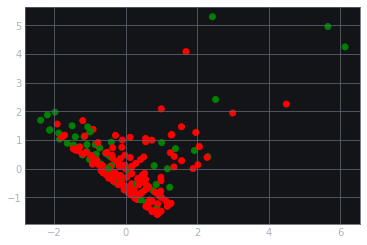

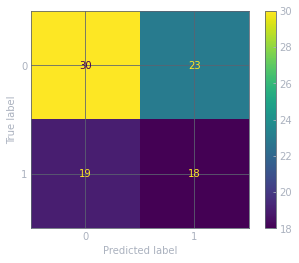

In [160]:
run_experiment(['age', 'creatinine_phosphokinase'])